# Imports

In [21]:
import random
import numpy as np
import importlib
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier

import transformations as trans; importlib.reload(trans)
import visualisiations as vis; importlib.reload(vis)
import models; importlib.reload(models)
import metrics as met; importlib.reload(met)

<module 'metrics' from 'C:\\Users\\alons\\PycharmProjects\\machine_lerning\\Machine_Learning_Project\\metrics.py'>

In [ ]:
X_train, X_test, y_train, y_test = models.load_preprocess_mnist_data(scale_features=False, flatten_image=False, use_pca=False)

# Transformations Tests

## Center Image

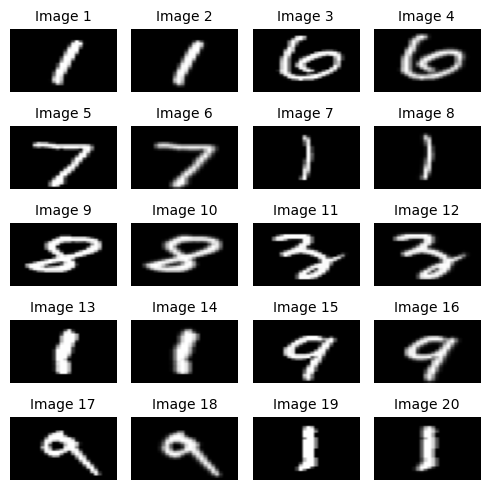

In [3]:
# plot images before and after centering:
sample_space = X_test[:100]
images = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(images, trans.center_image)

## Deskewing

##### is the deskewing function functioning? - NO.

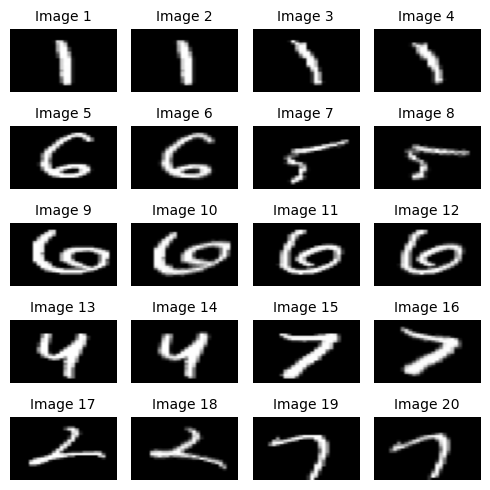

In [4]:
sample_space = X_test[:100]
image_list = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(image_list, trans.deskew_image)

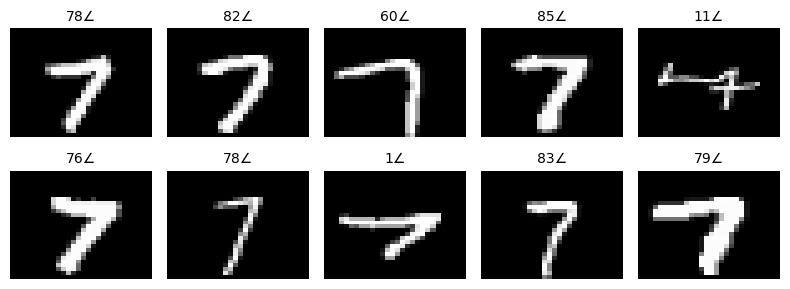

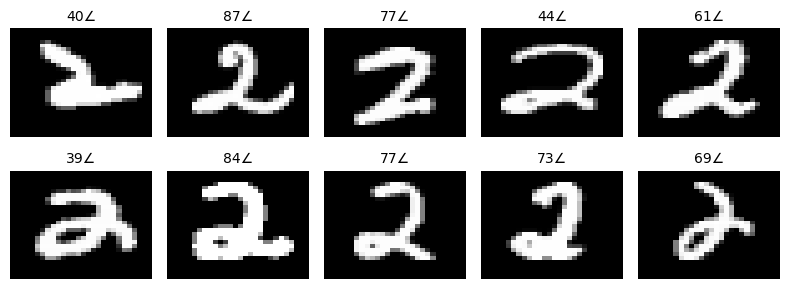

In [5]:
sample_space = X_train[y_train == 7]
images = random.sample(list(sample_space), 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

sample_space = list(X_train[y_train == 2])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

## Forier transorm

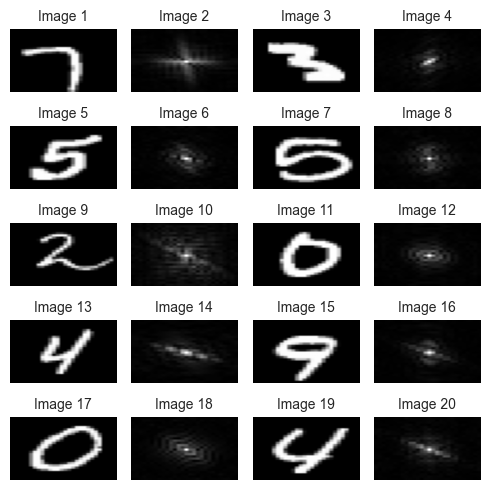

In [22]:
from transformations import fourier_transform_features
sample_space = X_train
images = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(images, transformation=fourier_transform_features)

## PCA

c:\Users\noams\anaconda3\envs\mnist_sklearn\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\noams\anaconda3\envs\mnist_sklearn\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\noams\anaconda3\envs\mnist_sklearn\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\noams\anaconda3\envs\mnist_sklearn\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\noams\anaconda3\envs\mnist_sklearn\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pi


=== KNN ===
Accuracy: 0.9752


,precision,recall,f1-score,support
0,0.97,0.99,0.98,980.00
1,0.98,1.00,0.99,1135.00
2,0.98,0.98,0.98,1032.00
3,0.97,0.97,0.97,1010.00
4,0.98,0.98,0.98,982.00
5,0.97,0.97,0.97,892.00
6,0.98,0.99,0.98,958.00
7,0.97,0.97,0.97,1028.00
8,0.98,0.95,0.97,974.00
9,0.97,0.96,0.97,1009.00


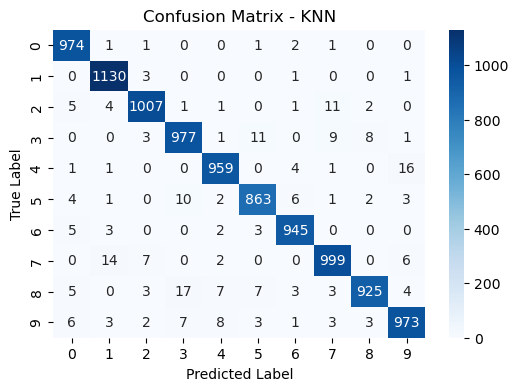

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = models.load_preprocess_mnist_data(scale_features=True, flatten_image=True, use_pca=True, pca_variance=0.85)
knn = models.train_knn(X_train_pca, y_train, X_test_pca, y_test, k=3)

## Elastic Deformations

In [53]:
deformation_parameters = {"random_state":np.random.RandomState(42), "sigma":6, "alpha":30}

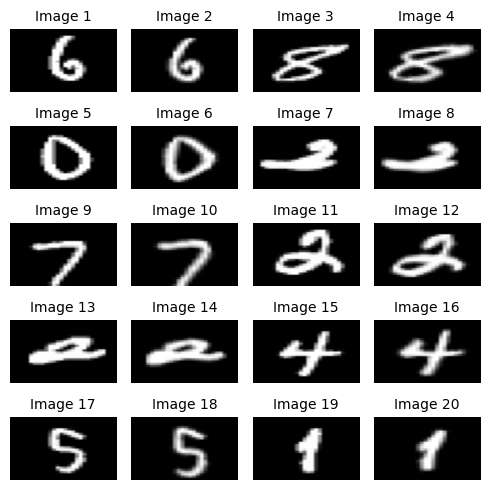

In [54]:
sample_space = X_train
images = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(images, trans.random_elastic_deformation, **deformation_parameters)

In [55]:
X_train_deformed = [trans.random_elastic_deformation(image, **deformation_parameters) for image in X_train]
X_test_deformed = [trans.random_elastic_deformation(image, **deformation_parameters) for image in X_test]

In [56]:
# print shapes:
print(np.array(X_train_deformed).shape)
print(np.array(X_test_deformed).shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# concatenate the original and deformed features
X_train_augmented = np.concatenate((trans.flatten_images(X_train), trans.flatten_images(X_train_deformed)))
X_test_augmented = np.concatenate((trans.flatten_images(X_test), trans.flatten_images(X_test_deformed)))

# concatenate the original and deformed labels
y_train_augmented = np.concatenate((y_train, y_train))
y_test_augmented = np.concatenate((y_test, y_test))

print(X_train_augmented.shape)
print(X_test_augmented.shape)

print(y_train_augmented.shape)
print(y_test_augmented.shape)

(120000, 784)
(20000, 784)
(120000,)
(20000,)



=== KNN ===
Accuracy: 0.9563


,precision,recall,f1-score,support
0,0.95,0.99,0.97,1960.00
1,0.94,1.00,0.97,2270.00
2,0.98,0.94,0.96,2064.00
3,0.95,0.96,0.96,2020.00
4,0.97,0.94,0.96,1964.00
5,0.95,0.95,0.95,1784.00
6,0.97,0.97,0.97,1916.00
7,0.94,0.95,0.95,2056.00
8,0.98,0.91,0.95,1948.00
9,0.93,0.95,0.94,2018.00


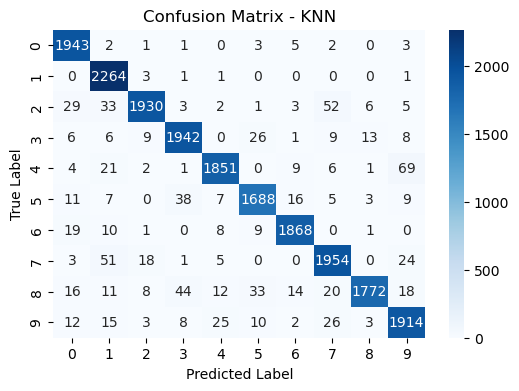

In [ ]:
knn = models.train_knn(X_train_augmented, y_train_augmented, X_test_augmented, y_test_augmented, k=3)

In [59]:
knn.score(trans.flatten_images(X_test), y_test)

0.9715

# Distance Metrics

## EMD

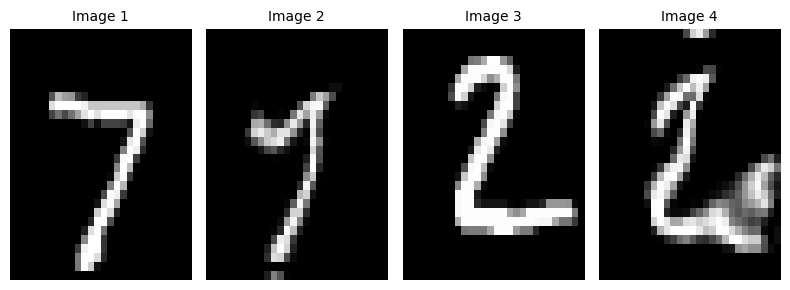

133.0
188.5


In [ ]:
images = X_test[:2]
trans_images = np.array([trans.random_elastic_deformation(image, random_state=np.random.RandomState(42), sigma=3, alpha=30) for image in images])

combined_images = np.array([image for pair in zip(images, trans_images) for image in pair])

# x = 5
vis.plot_grid(combined_images, col_count=4, figsize=(8, 3))
print(met.get_earth_mover_distance(combined_images[0], combined_images[1]))
print(met.get_earth_mover_distance(combined_images[0], combined_images[2]))

# def get_dist_between_images(dist_func, image_pairs) -> List[double]:

# def print

In [ ]:
X_train, X_test, y_train, y_test = models.load_preprocess_mnist_data(scale_features=False, flatten_image=True)

knn = KNeighborsClassifier(n_neighbors=3, metric=met.get_earth_mover_distance)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

KNeighborsClassifier(metric=<function get_move_ether_distance at 0x0000025107C334C0>,
                     n_neighbors=3)

In [ ]:
# get the number of processors
import os
cores_num = os.cpu_count()
knn = KNeighborsClassifier(n_neighbors=3, metric=met.get_earth_mover_distance, n_jobs=-3)

knn.fit(X_train[:10], y_train[:10])
knn.score(X_test, y_test)

0.2317

Original shape: (60000, 28, 28)
Processed shape: (10000, 21)
Feature vector length per image: 21


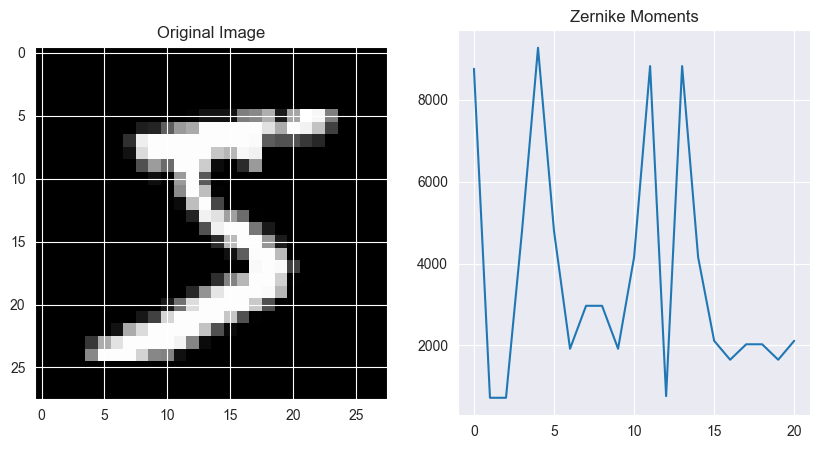

In [25]:
import cv2
import transformations as trans; importlib.reload(trans)
from transformations import *
 # Process first few images as example (adjust as needed)
num_samples = len(X_test)
train_features = preprocess_with_zernike(X_train[:num_samples], max_order=5)

print(f"Original shape: {X_train.shape}")
print(f"Processed shape: {train_features.shape}")
print(f"Feature vector length per image: {train_features.shape[1]}")

# You can now use train_features for your ML model

# Optional: Visualize first image and its moments
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(X_train[0], cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.plot(train_features[0])
plt.title('Zernike Moments')
plt.show()
